In [1]:
!pip install pandas matplotlib scikit-learn


C:\Users\Ar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Ar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Ar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Ar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\U

RMSE: 25.83
R² Score: -5.70
2025-07-30 -> Predicted Price: 3446.25
2025-07-31 -> Predicted Price: 3447.82
2025-08-01 -> Predicted Price: 3447.34
2025-08-02 -> Predicted Price: 3413.38
2025-08-03 -> Predicted Price: 3413.38
2025-08-04 -> Predicted Price: 3412.50
2025-08-05 -> Predicted Price: 3414.08


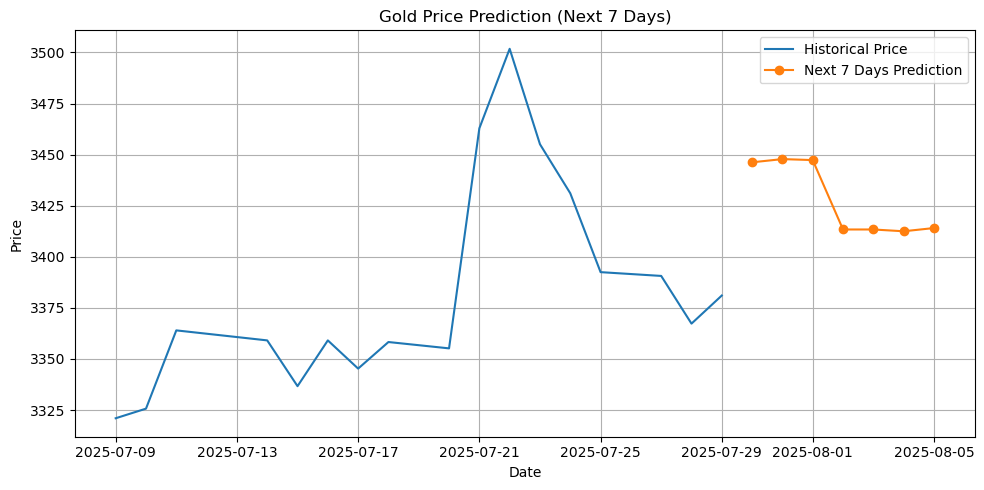

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and clean the dataset
df = pd.read_csv('Gold_Futures_Historical_Data.csv')

# Step 2: Preprocess
df = df[::-1]  # reverse to make it chronological (oldest to latest)

# Remove commas and convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Step 3: Create lag features for previous 7 days
for i in range(1, 8):
    df[f'lag_{i}'] = df['Price'].shift(i)

df = df.dropna()  # Drop rows with NaN due to shifting

# Step 4: Train-test split
X = df[[f'lag_{i}' for i in range(1, 8)]]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')

# Step 7: Predict next 7 days
last_known = df.iloc[-7:]['Price'].values.tolist()
future_preds = []

for i in range(7):
    X_input = np.array(last_known[-7:]).reshape(1, -1)
    pred = model.predict(X_input)[0]
    future_preds.append(pred)
    last_known.append(pred)

# Step 8: Show predictions
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
for date, price in zip(future_dates, future_preds):
    print(f'{date.date()} -> Predicted Price: {price:.2f}')

# Step 9: Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'].iloc[-30:], df['Price'].iloc[-30:], label='Historical Price')
plt.plot(future_dates, future_preds, marker='o', label='Next 7 Days Prediction')
plt.title("Gold Price Prediction (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
